### Basic Setup

In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Assuming an independant x consisting of 100 data points between 1 and 10

In [17]:
x = np.linspace(1, 10, num=100)
x[:5]

array([1.        , 1.09090909, 1.18181818, 1.27272727, 1.36363636])

Creating a dependant variable such that:
Y = 2X + 5 + some amount of noise

In [18]:
# creating the noise or error
E = np.random.uniform(low = 0, high = 1, size=100)
E[:5]

array([0.42631358, 0.84767522, 0.90997262, 0.99790302, 0.8930875 ])

In [19]:
# creating the dependant variable
y = 2*x + 5 + E
y[:5]

array([7.42631358, 8.0294934 , 8.27360898, 8.54335757, 8.62036023])

Lets plot the data points

In [20]:
import seaborn as sns

[]

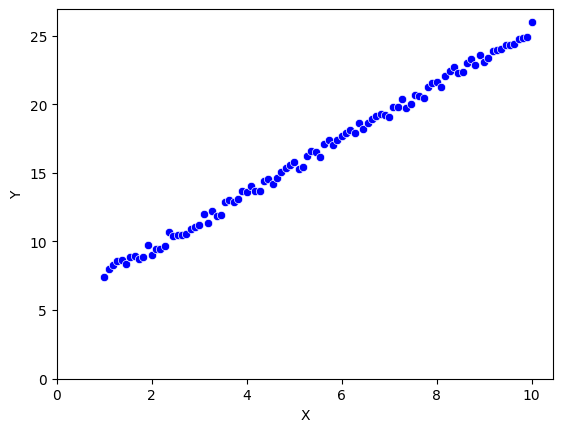

In [21]:
sns.scatterplot(x = x, y = y, color = "b")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0,)
plt.ylim(0,)
plt.plot()

### Method 1 - Pure Maths

Below is the derivations

IMAGE_1

In [77]:
from IPython.display import Image

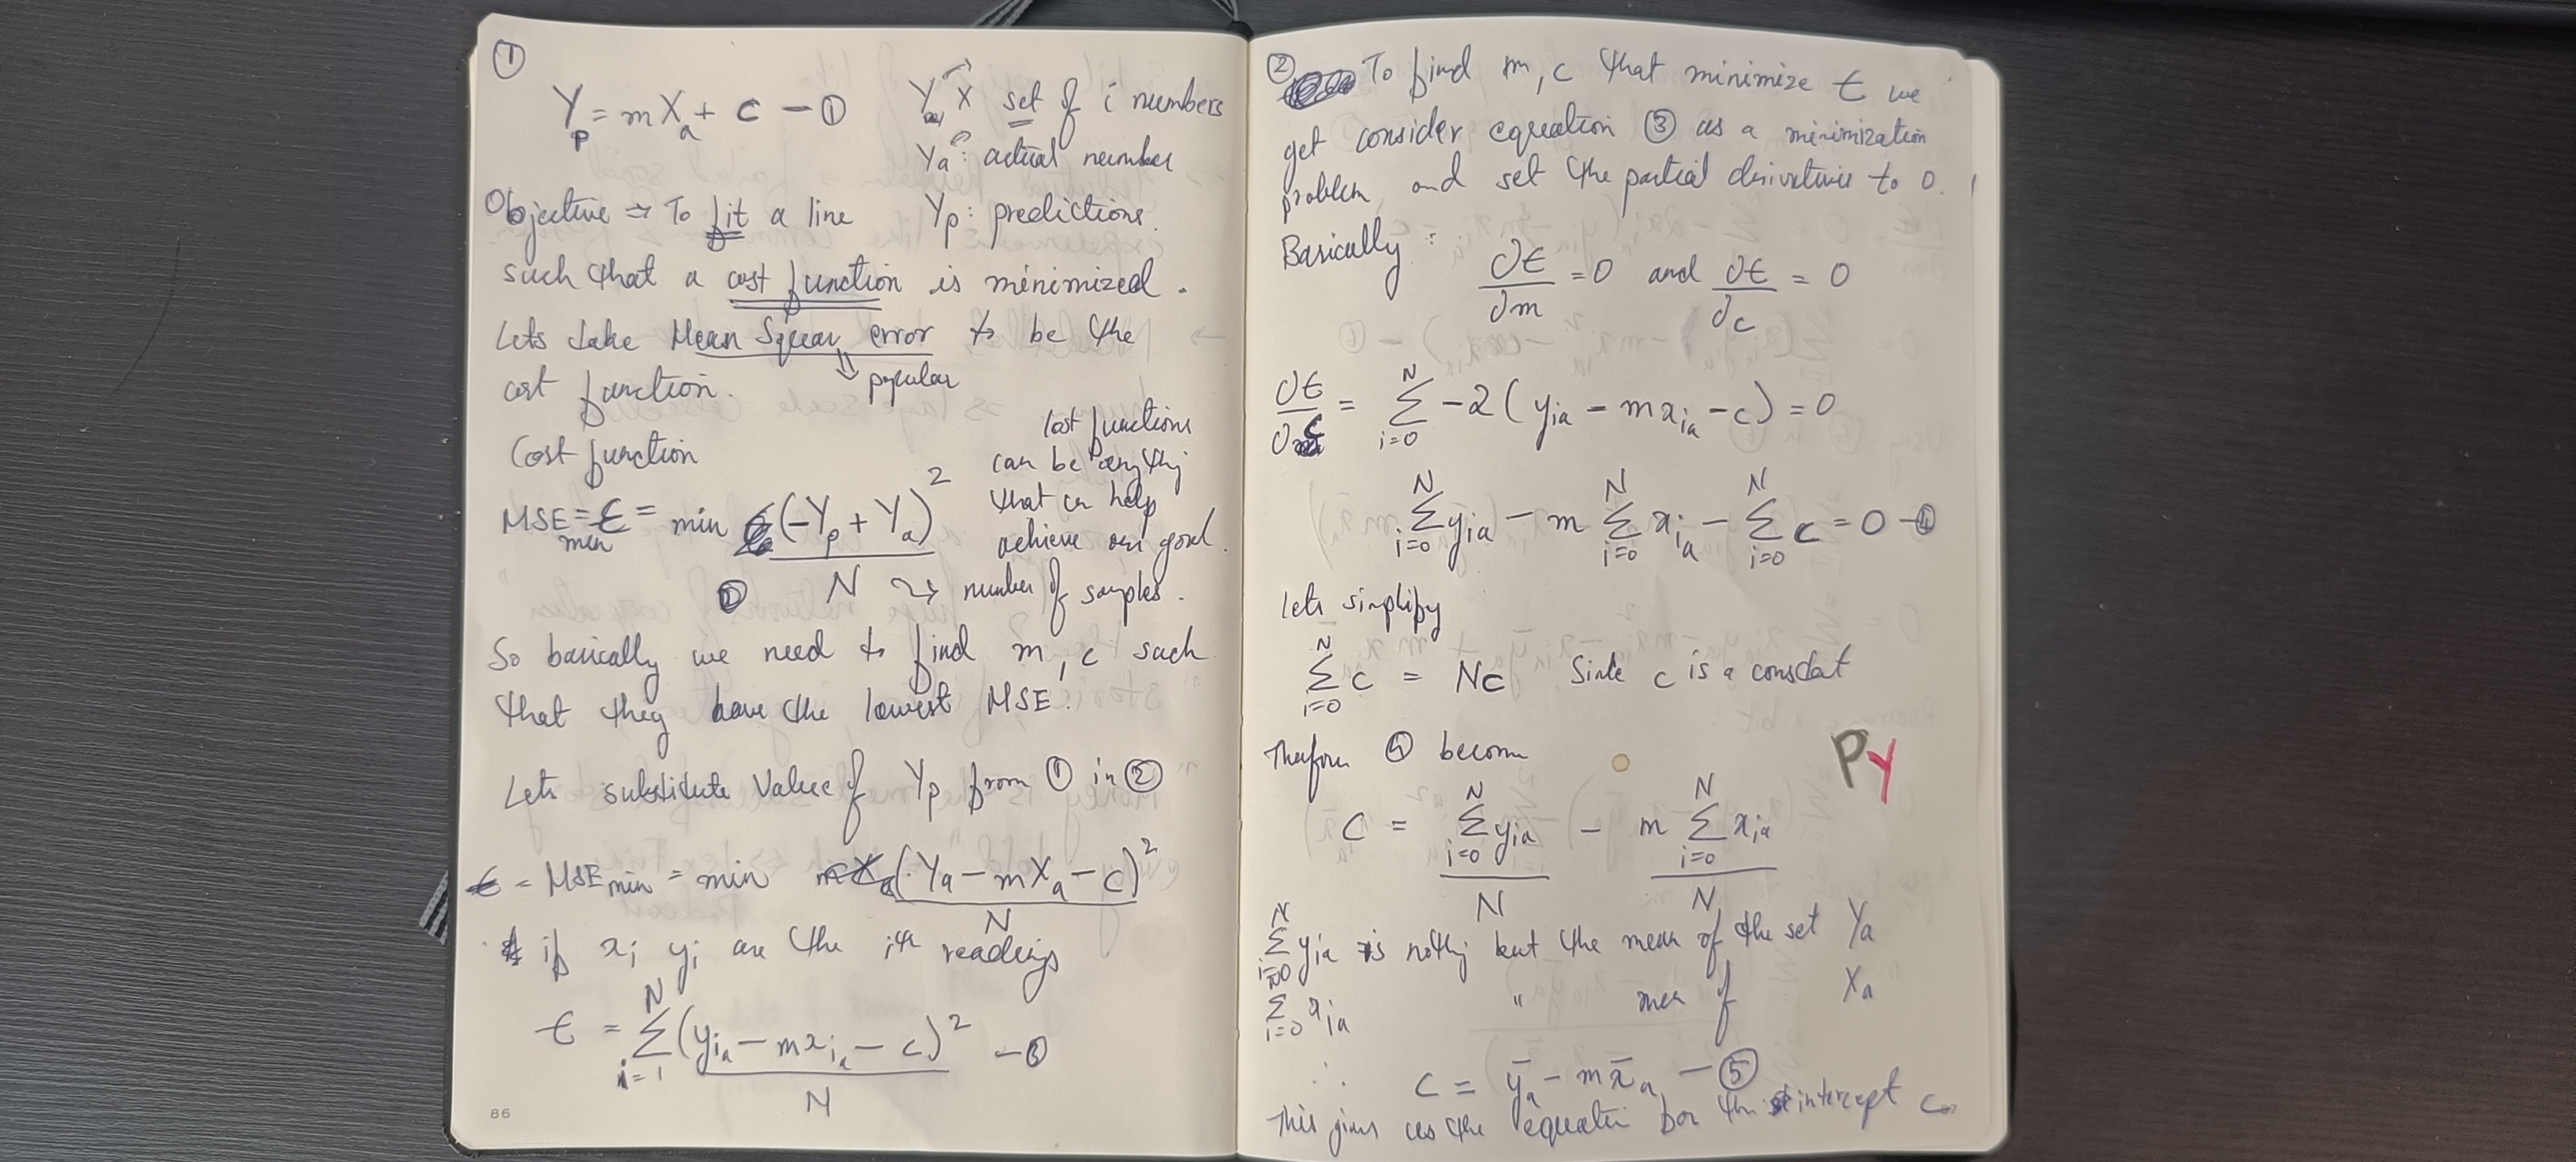

In [78]:
Image(filename='derivation_1.png')

FileNotFoundError: [Errno 2] No such file or directory: 'https://github.com/PyMyCode/SimpleLinearRegression/blob/master/testing.png'

IMAGE_2

Lets use the above derivation to compute the slope m and intercept c of the linear regression line that fits the data best and hence has the least error (mean square error).

#### Solving for slope m

Means of Independent variable

In [22]:
# mean of independent variables
x_mean = x.sum()/len(x)
y_mean = y.sum()/len(y)
print(x_mean)
print(y_mean)

5.5
16.485279674191727


In [23]:
# variance of x
x_variance = sum(abs(x - x_mean)**2)/len(x)
y_variance = sum(abs(y - y_mean)**2)/len(y)
print(x_variance)
print(y_variance)

6.886363636363638
27.364874614301556


In [24]:
xy_covariance = sum((x - x_mean) * (y - y_mean))/len(x)
print(xy_covariance)

13.705131512714178


Now using equation 9 to calculate the slope

B1 = Cov(xy)/Var(x)

In [27]:
m = xy_covariance/x_variance
print(m)

1.990184114057504


Now plugging in the value of the slope m in equation 10 to calculate the intercept c

c = y_mean - m * x_mean

In [28]:
c = y_mean - m * x_mean
print(c)

5.539267046875455


Finally we get the fitted linear model as the follows:

In [30]:
print(f'y = {m}*x + {c}')

y = 1.990184114057504*x + 5.539267046875455


Now lets use the above equation make predictions and compare it with the actual depend variable y

In [31]:
# creating the function to help with predictions
def _linear_model(a): # a = x (independant variable)
    b = m * a + c # b = y (dependant variable)
    return b

In [32]:
# using the above function to predict
y_pred = _linear_model(x)
y_pred[:5]

array([7.52945116, 7.71037699, 7.89130282, 8.07222865, 8.25315448])

Lets calculate compare the actuals with the predictions

In [54]:
# calculating the mean square error
mse_1 = sum((y - y_pred)**2) / len(y)
print(f'MSE = {mse_1}')

# calculating the coeff of determination
r2_score_1 = 1 - sum((y - y_pred)**2) / sum((y - y_mean)**2)
print(f'R2 = {r2_score_1}')

[0.0891396]


Coefficient of determination (r2_score) basically checks how much better does the fitted regression line perform as opposed to the simple mean

In [55]:
# calculating the coeff of determination
r2_score_1 = 1 - sum((y - y_pred)**2) / sum((y - y_mean)**2)
r2_score_1

array([0.99674255])

### Method 1 - Computational Power

In [61]:
def cost_function(x, y, b0, b1):
    # mean square error
    error = sum((b1*x + b0 - y)**2)/len(x)
    return error

In [62]:
def optimization(splice):
    steps = np.linspace(1,10, num=splice) # splicing the numbers between 1 and 10
    #initial setup
    error = 100
    b0 = 0
    b1 = 0
    for i in steps: # b0
        for h in steps: #b1
            error_updated = cost_function(x, y, i, h)
            if error_updated < error:
                b0 = i
                b1 = h
                error = error_updated
    return error[0], b0, b1


Lets first try by slicing the range (1, 10) into 10 parts

In [63]:
mse_2, c, m = optimization(10)
print(f'y = {m}*x + {c}')
print(f'MSE = {mse_2}')

y = 2.0*x + 5.0
MSE = 0.3252994710829983


Lets first try by slicing the range (1, 10) into 100 parts. Hence, using more computational power.

In [65]:
mse_2, c, m = optimization(100)
print(f'y = {m}*x + {c}')
print(f'MSE = {mse_2}')

y = 2.0*x + 5.454545454545455
MSE = 0.09074770115663638


As you can see, the regression is model is getting better at fitting the data

#### predictions

### Method 3 - Using the Scikit-Learn Library

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
lm = LinearRegression()

In [69]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
lm.fit(x,y)

LinearRegression()

In [70]:
y_pred = lm.predict(x)

In [71]:
y_pred[:5]

array([[7.52945116],
       [7.71037699],
       [7.89130282],
       [8.07222865],
       [8.25315448]])

In [72]:
mean_squared_error(y, y_pred)

0.08913959662888628

In [73]:
r2_score(y, y_pred)

0.996742554172629

In [75]:
print(f'y = {lm.coef_[0][0]}*x + {lm.intercept_[0]}')
mse_3 = mean_squared_error(y, y_pred)
r2_score_3 = r2_score(y, y_pred)
print(f'MSE = {mse_3}')
print(f'R2 = {r2_score_3}')

y = 1.9901841140575047*x + 5.53926704687545
MSE = 0.08913959662888628
R2 = 0.996742554172629
